In [11]:
from generateTrees import Node, deserialize
import matplotlib.pyplot as plt
import networkx as nx


In [14]:
#serial es un arbol serializado, pruevo convertirlo en arbol y graficarlo
serial = ['#', '#', '13', '#', '#', '66', '91', '#', '#', '#', '26', '88', '98', '#', '#', '64', '#', '#', '89', '66', '#', '3', '18']
semicolon_separated_string = ';'.join(serial)

print(semicolon_separated_string)

#;#;13;#;#;66;91;#;#;#;26;88;98;#;#;64;#;#;89;66;#;3;18


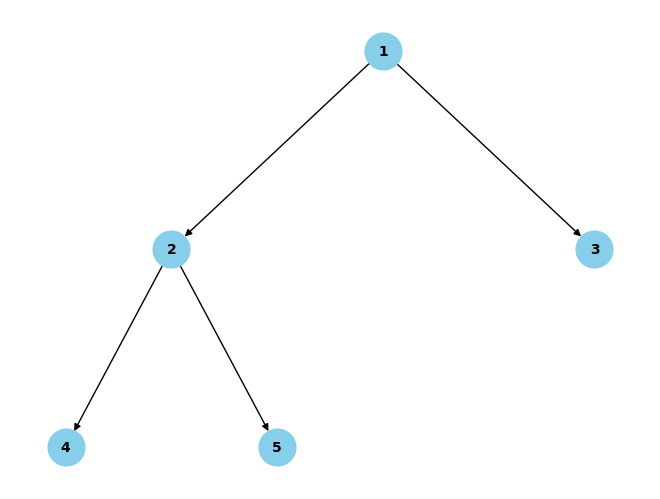

In [8]:
def create_graph(root, graph=None, pos=None, x=0, y=0, layer=1):
    if graph is None:
        graph = nx.DiGraph()
    if pos is None:
        pos = {root.data: (x, y)}

    if root.left:
        graph.add_edge(root.data, root.left.data)
        pos[root.left.data] = (x - 2 ** (5 - layer), y - 1)
        create_graph(root.left, graph, pos, x - 2 ** (5 - layer), y - 1, layer + 1)

    if root.right:
        graph.add_edge(root.data, root.right.data)
        pos[root.right.data] = (x + 2 ** (5 - layer), y - 1)
        create_graph(root.right, graph, pos, x + 2 ** (5 - layer), y - 1, layer + 1)

    return graph, pos

# Example usage:
# Assuming you have a tree defined, for instance, the one created in the previous example:

# Creating the tree
root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)

# Creating and plotting the graph
graph, pos = create_graph(root)
nx.draw(graph, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold")
plt.show()

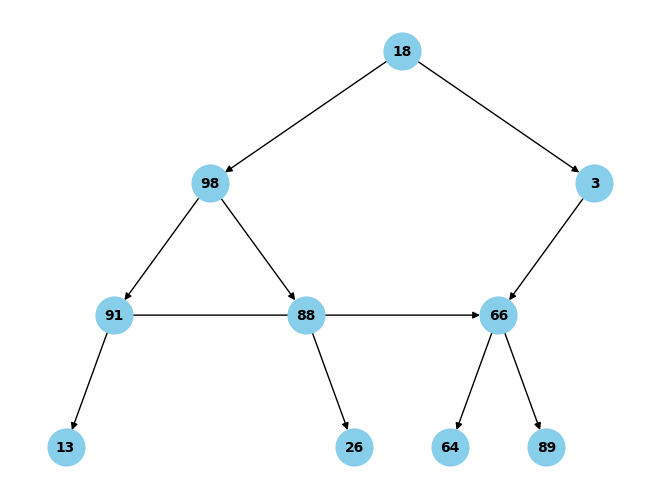

In [16]:
tree = deserialize(semicolon_separated_string)
graph, pos = create_graph(tree)
nx.draw(graph, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold")
plt.show()